In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Let's do some Machine Learning!**

# TASK 1 - LOAD DATASET
Below you can find the download and a description of the **california housing dataset** from sklearn:

In [2]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
california_housing.keys() # california_housing is a dict object. Show which keys the dict contains.

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Put data into a pandas dataframe, set column names
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# Add target variable to the dataframe
df['MedHouseVal'] = california_housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Convert values to full dollar values
df['MedInc'] = df['MedInc'].apply(lambda x: x * 10000)
df['MedHouseVal'] = df['MedHouseVal'].apply(lambda x: x * 100000)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,83252.0,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,83014.0,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,72574.0,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,56431.0,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,38462.0,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


# ✏️ TASK 2 - UNDERSTAND THE DATA
- Have a look at the data. What do the **columns** mean? What about the values and data types?
- How are the **values** distributed? (Min, Max, Mean)
- How do features correlate to each other? Try to create a **correlation matrix**. Does the correlation matrix show any relations?

Useful methods for this task: 
- <code>df.info()</code> gives an overview over the columns of a dataframe.
- <code>df.describe()</code> gives an overview over statistical metrics of the values of a dataframe.
- <code>df.corr()</code> computes the correlation between the columns of a dataframe.

<details>
  <summary>❔</summary> 

  - To create a correlation matrix you can use the method <code>.corr()</code> on a pandas dataframe. You can visualize the matrix by putting it into a seaborn heatmap <code>sns.heatmap()</code>
</details>

In [7]:
df.info() # 9 columns, all of type float, 20640 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe() # MedHouseVal is between 14999 and 500001

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,38706.710029,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,206855.816909
std,18998.217179,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,115395.615874
min,4999.000000,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,14999.000000
25%,25634.000000,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,119600.000000
50%,35348.000000,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,179700.000000
75%,47432.500000,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,264725.000000
max,150001.000000,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,500001.000000


In [9]:
df.corr() # difficult to read, let's put it in a heatmap (see below)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

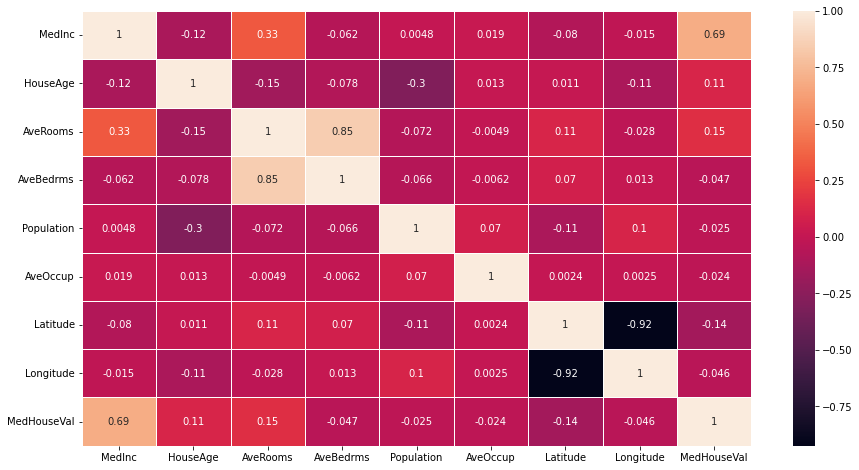

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr() , annot=True , lw=1)
# Important is the row or column of the target 'MedHouseVal'
# MedHouseVal has strong correlation with MedInc (0.69)
# little correlation with HouseAge, AveRooms and Latitude

# ✏️ TASK 3 - VISUALIZATION
Let's create some nice pictures, to gain deeper understanding of the data:
- Visualize the distribution of the target variable *MedHouseVal* by creating a histogram.
- Visualize geographic distribution: Create a scatterplot with Longitude as x values and Latitude as y values. Colour sample points depend on their *MedHouseVal*.

<details>
  <summary>❔</summary> 

  - You can easily create a histogram by using [seaborn's histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html): <code>sns.histplot()</code>.
  - Use [seaborn's scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) <code>sns.scatterplot(data=, x=, y=, hue=)</code>.
    
</details>


<AxesSubplot:xlabel='MedHouseVal', ylabel='Count'>

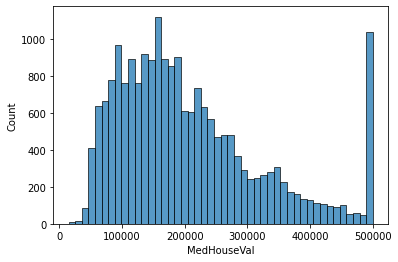

In [11]:
sns.histplot(df['MedHouseVal'])
# Histplot shows the distribution. Values of MedHouseVal are between about 0 and 500000.

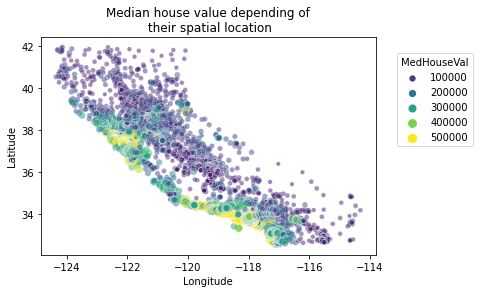

In [12]:
sns.scatterplot(data=df, x="Longitude", y="Latitude", size="MedHouseVal", hue="MedHouseVal", palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

# You may notice, that the scatter looks like the California map. 
# Areas near the coast or big cities seem to be more expensive.

### ✏️ Subtask - Pair Plot
Pair plots are used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 

Have a look at the pair plot below. Can you draw any conclusions? Which feature might be a good one to use for prediction?

In [13]:
# Reduce the dataset to a smaller subset (otherwise creation of pairplot would take too long)
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = df.drop(columns_drop, axis=1)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

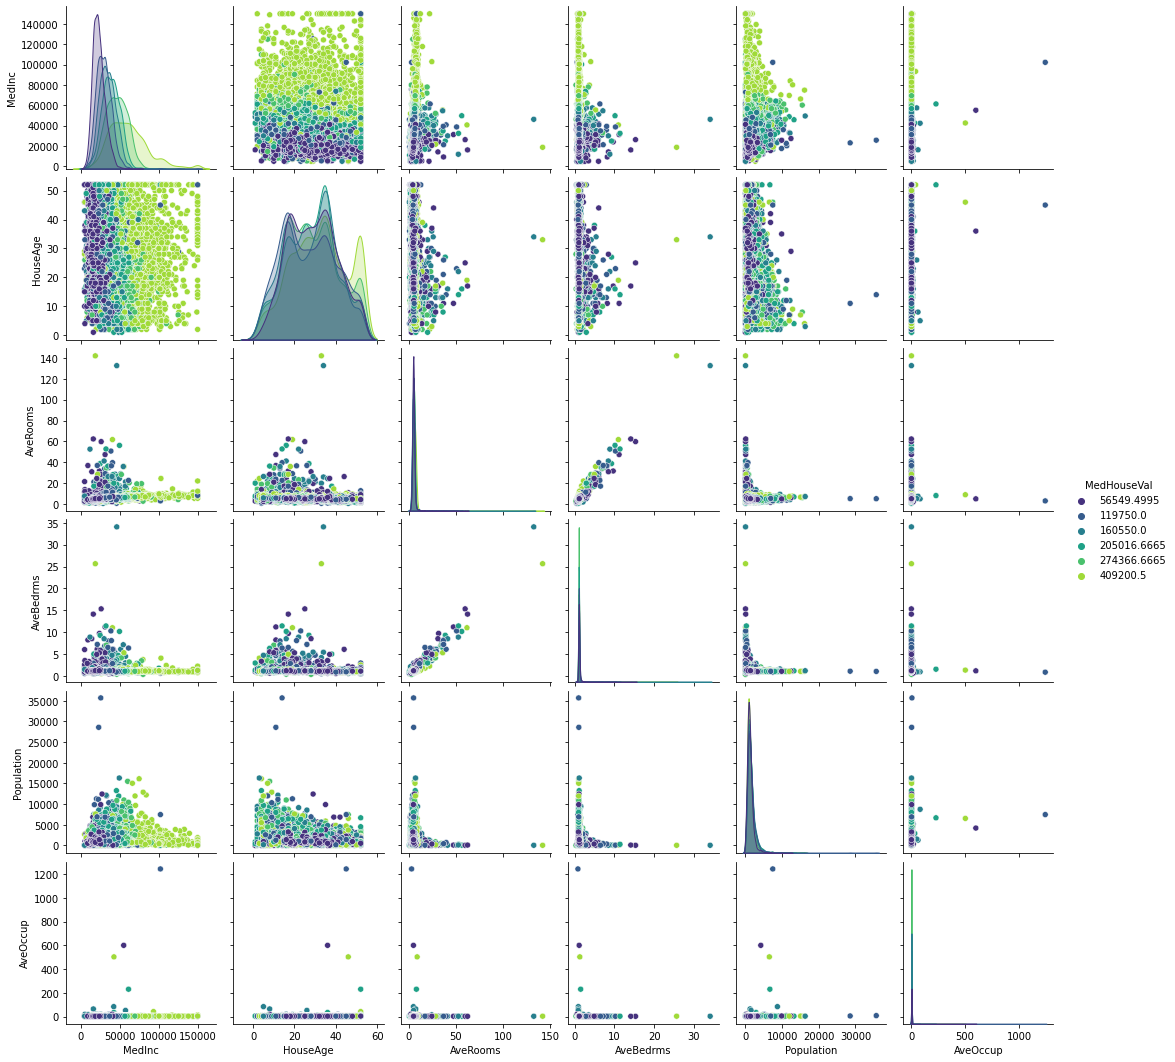

In [14]:
sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

# The plots including MedInc do distinguish best

# ✏️ TASK 4 - MACHINE LEARNING MODEL
- First split the dataset into train and test data by using [sklearn's train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Create a simple machine learning modell by using [sklearn's Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). **Fit** the model with the training data and **predict** the test data. 
- Evaluate performance by computing the [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html).
- Try the same with a second machine learning model: [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Compare the results. For which method do you decide?

In [15]:
from sklearn.model_selection import train_test_split

X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression()

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [17]:
# Let's compare the predicted values with the true values. How accurate is the prediction?
comparison = pd.DataFrame({"true": y_test.values, "predicted": y_pred})
comparison.head(10)

,true,predicted
0,47700.0,72563.461566
1,45800.0,176650.222718
2,500001.0,270545.812411
3,218600.0,283325.416283
4,278000.0,260410.134641
5,158700.0,201046.060130
6,198200.0,263613.388068
7,157500.0,216372.512548
8,340000.0,273958.057562
9,446600.0,389511.543925


In [18]:
from sklearn.metrics import mean_absolute_error

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mae

# Prediction differs about 52,957$ on average.

52957.10106684449

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Create model
model = RandomForestRegressor(random_state=42)

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mae

# With RandomForestRegression prediction is better (about 20,000$ less deviation).

33543.42809747504

# ✏️ TASK 5 - FINE TUNING
Up to now we put all available features into the model. Often models show better results with less features. It is crucial to find the best combination of features.

Select **different combinations of features**. Like above, create a RandomForestRegressor, fit and predict. Analyze the mean absolute error. Try different combinations of features. Maybe the pair plot from task 3 or the correlation matrix will give you some inspiration on which feature combinations to try. **What's the best one** in the end?

In [20]:
# Select features
X = df[['MedInc', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create model
model = RandomForestRegressor(random_state=42)

# Fit
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mae

# Proper selection of features can enhance performance.

30853.063385412297

# ✏️ TASK 6 - FINAL MODEL
- First, select features you have chosen in task 5.
- Then, create a model and train it with whole data (do NOT split into train/test).
- Export model to .joblib-file and store it in folder [artifacts](../artefacts/).

<details>
  <summary>❔</summary>
  
  - Export to .joblib-file with <code>joblib.dump(model, '..artefacts/model.joblib')</code>.
</details>

In [21]:
import joblib

# Select features
X = df[['MedInc', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

# Create model
model = RandomForestRegressor(random_state=42)

# Fit model (with all data)
model.fit(X, y)

# Export model
joblib.dump(model, '../artifacts/model.joblib')

['../artifacts/model.joblib']